<a href="https://colab.research.google.com/github/Tensai-Pro/SRI-PracticeTasks/blob/master/Word%20Embeddings/4)%20GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

import nltk;
nltk.download('stopwords');
from nltk.corpus import stopwords;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Practice Files/train.zip')
df.head(3)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...


# Предобработка текста

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
def prepare_text(text):
  tokens = simple_preprocess(text)
  tokens = [tok for tok in tokens if tok not in stopwords]
  return tokens

In [ ]:
df['tokenized_text'] = df.Description.apply(prepare_text)

In [ ]:
df.head()

,Class Index,Title,Description,tokenized_text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...","[reuters, short, sellers, wall, street, dwindl..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,"[reuters, private, investment, firm, carlyle, ..."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,"[reuters, soaring, crude, prices, plus, worrie..."
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,"[reuters, authorities, halted, oil, export, fl..."
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","[afp, tearaway, world, oil, prices, toppling, ..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.tokenized_text, df['Class Index'],
                                                    shuffle=True, random_state=42)

# Pre-trained Glove

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-04-29 22:41:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-04-29 22:41:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-04-29 22:41:57--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_file = '/content/glove.6B.100d.txt'
tmp_file = get_tmpfile("glove2word2vec.txt")
glove2word2vec(glove_file, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)

<ipython-input-11-a3752adbba49>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, tmp_file)


In [ ]:
!rm glove.6B.50d.txt
!rm glove.6B.100d.txt
!rm glove.6B.200d.txt
!rm glove.6B.300d.txt
!rm glove.6B.zip

Проверка

In [ ]:
print('King: ', model.get_vector('king'))

King:  [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.41394  -1.3363   -0.61915  -0.33089  -0.52881
  0.16483  -

In [ ]:
res = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)
print('Most similar words to King + Woman: ', res)

Most similar words to King + Woman:  [('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473)]


In [ ]:
res = model.most_similar(positive=['dog', 'kitten'], negative=['cat'], topn=3)
print('Most similar words to Dog + Kitten: ', res)

Most similar words to Dog + Kitten:  [('puppy', 0.685601532459259), ('rottweiler', 0.5782471299171448), ('puppies', 0.5646027326583862)]


In [ ]:
res = model.most_similar(positive=['russia'], topn=7)
print('7 most similar words to Russia: ', res)

7 most similar words to Russia:  [('ukraine', 0.861518144607544), ('russian', 0.8086091876029968), ('moscow', 0.7951146364212036), ('belarus', 0.7880359888076782), ('bulgaria', 0.7161967754364014), ('iran', 0.7155873775482178), ('kazakhstan', 0.7087132334709167)]


In [ ]:
res = model.most_similar(positive=['dragon'], topn=7)
print('7 most similar words to Dragon: ', res)

7 most similar words to Dragon:  [('lion', 0.6983296275138855), ('beast', 0.6831859350204468), ('lantern', 0.6824426651000977), ('demon', 0.6763894557952881), ('sword', 0.6743978261947632), ('warrior', 0.6735644340515137), ('serpent', 0.6687331199645996)]


In [ ]:
len(model.index_to_key)

400000

# GloVe

In [34]:
class Word2VecVectorizer:
  def __init__(self, model):
    print('Loading in word vectors...')
    self.word_vectors = model
    print('Finished loading word vectors.')

  
  def fit(self, data):
    pass


  def transform(self, data):
    vectorized_data = np.zeros((len(data), 100))
    
    n = 0
    empty_cnt = 0
    not_found_words = {}

    for text in data:
      vecs = []
      
      for token in text:
        try:
          vec = self.word_vectors.get_vector(token)
          vecs.append(vec)
        except KeyError:
          if token in not_found_words:
            not_found_words[token] += 1
          else:
            not_found_words[token] = 0

      if len(vecs) > 0:
        vecs = np.array(vecs)
        vectorized_data[n] = vecs.mean(axis=0)
      else:
        empty_cnt += 1

      n += 1

    print(f'Number of samples with no words found: {empty_cnt}/{len(data)}')
    print(f'Number of words that were not found: {len(not_found_words.keys())}')
    # print(f'Words that were not found: {[word for word in not_found_words.keys()]}')

    return vectorized_data


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [35]:
w2v_vectorizer = Word2VecVectorizer(model)

Loading in word vectors...
Finished loading word vectors.


In [36]:
X_train_vectorized = w2v_vectorizer.fit_transform(X_train)
X_test_vectorized = w2v_vectorizer.transform(X_test)

Number of samples with no words found: 0/90000
Number of words that were not found: 4438
Number of samples with no words found: 0/30000
Number of words that were not found: 1809


In [ ]:
print(X_train_vectorized.shape, y_train.shape)
print(X_test_vectorized.shape, y_test.shape)

(90000, 100) (90000,)
(30000, 100) (30000,)


# Классификация

## MultinomialNB

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_test_scaled = scaler.transform(X_test_vectorized)

In [ ]:
clf_nb = MultinomialNB().fit(X_train_scaled, y_train)

In [ ]:
y_pred_nb = clf_nb.predict(X_test_scaled)

In [ ]:
acc_score = clf_nb.score(X_test_scaled, y_test) * 100
print(f'Accuracy: {acc_score}%')

Accuracy: 84.30333333333333%


## K-Nearest Neighbor (KNN)

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled, y_train)

In [ ]:
y_pred_knn = clf_knn.predict(X_test_scaled)

In [ ]:
acc_score = clf_knn.score(X_test_scaled, y_test) * 100
print(f'Accuracy: {acc_score}%')

Accuracy: 89.83666666666666%


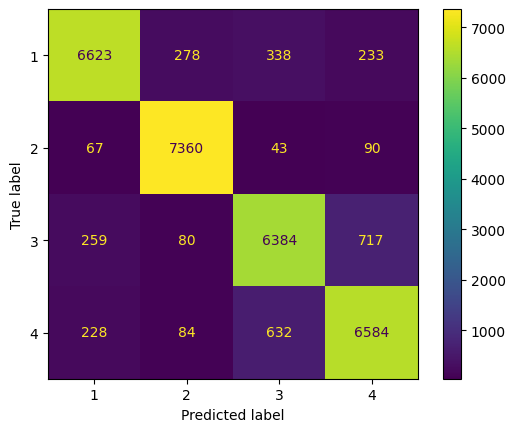

In [ ]:
cm_knn = confusion_matrix(y_test.values, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_knn.classes_).plot();